# Data exploration and visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

# Load data
with np.load('cifar4-train.npz', allow_pickle=False) as npz_file:
    cifar_train = dict(npz_file.items())
print('It is a dictionary with keys:', list(cifar_train.keys()))
cifar_train  

It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


{'pixels': array([[255, 255, 255, ..., 158, 145, 136],
        [208, 216, 210, ...,  49,  57,  78],
        [191, 199, 207, ...,   3,  98, 148],
        ...,
        [254, 254, 254, ...,  61,  56,  58],
        [ 61,  62,  49, ...,  79,  86,  56],
        [110, 108, 122, ..., 153, 142, 146]], dtype=uint8),
 'overfeat': array([[ 3.7246094 , -0.38476562,  1.5878906 , ..., -1.7158203 ,
          1.8623047 , -0.6801758 ],
        [ 3.0859375 ,  0.36206055,  0.36206055, ..., -2.3105469 ,
          2.9140625 , -1.5117188 ],
        [ 4.2265625 ,  1.1328125 , -1.1308594 , ...,  1.6074219 ,
         -1.3417969 , -2.3984375 ],
        ...,
        [ 2.5585938 ,  1.0693359 ,  0.28588867, ..., -1.1923828 ,
          0.8745117 , -0.86621094],
        [ 3.2832031 ,  0.7001953 ,  1.1855469 , ..., -1.0058594 ,
          0.97558594,  1.2060547 ],
        [ 3.9707031 ,  0.28198242,  0.4013672 , ..., -1.3759766 ,
          2.6230469 , -1.2578125 ]], dtype=float32),
 'labels': array([0, 1, 2, ..., 0, 0, 

# pixels

In [2]:
# Convert pixels into floating point numbers
pixels = cifar_train['pixels'].astype(np.float32)
print('pixels:', pixels.shape, pixels.dtype)
print(pixels)
print()

# Rescale pixel values between -0.5 and 0.5
#pixels = (pixels - 128) / 255
pixels = pixels / 255
print('pixels:', pixels.shape, pixels.dtype)
print()
print(pixels)

pixels: (5000, 3072) float32
[[255. 255. 255. ... 158. 145. 136.]
 [208. 216. 210. ...  49.  57.  78.]
 [191. 199. 207. ...   3.  98. 148.]
 ...
 [254. 254. 254. ...  61.  56.  58.]
 [ 61.  62.  49. ...  79.  86.  56.]
 [110. 108. 122. ... 153. 142. 146.]]

pixels: (5000, 3072) float32

[[1.         1.         1.         ... 0.61960787 0.5686275  0.53333336]
 [0.8156863  0.84705883 0.8235294  ... 0.19215687 0.22352941 0.30588236]
 [0.7490196  0.78039217 0.8117647  ... 0.01176471 0.38431373 0.5803922 ]
 ...
 [0.99607843 0.99607843 0.99607843 ... 0.23921569 0.21960784 0.22745098]
 [0.23921569 0.24313726 0.19215687 ... 0.30980393 0.3372549  0.21960784]
 [0.43137255 0.42352942 0.47843137 ... 0.6        0.5568628  0.57254905]]


In [3]:
pixels_df=pd.DataFrame(pixels) #convert to dataframe
print('pixels:', pixels_df.shape)
print(pixels_df.head())

pixels: (5000, 3072)
       0         1         2         3         4         5         6     \
0  1.000000  1.000000  1.000000  0.984314  0.984314  0.984314  0.984314   
1  0.815686  0.847059  0.823529  0.807843  0.839216  0.780392  0.803922   
2  0.749020  0.780392  0.811765  0.627451  0.701961  0.772549  0.596078   
3  0.760784  0.839216  0.976471  0.760784  0.839216  0.964706  0.776471   
4  0.117647  0.125490  0.074510  0.098039  0.094118  0.047059  0.180392   

       7         8         9       ...         3062      3063      3064  \
0  0.984314  0.984314  0.984314    ...     0.152941  0.196078  0.223529   
1  0.839216  0.760784  0.803922    ...     0.305882  0.203922  0.223529   
2  0.701961  0.776471  0.666667    ...     0.568627  0.011765  0.372549   
3  0.854902  0.972549  0.788235    ...     0.647059  0.658824  0.701961   
4  0.172549  0.101961  0.290196    ...     0.466667  0.564706  0.509804   

       3065      3066      3067      3068      3069      3070      3071  
0  

# Overfeat

In [4]:
overfeat=cifar_train['overfeat']
print('overfeat:', overfeat.shape, overfeat.dtype)
print(overfeat)

overfeat: (5000, 4096) float32
[[ 3.7246094  -0.38476562  1.5878906  ... -1.7158203   1.8623047
  -0.6801758 ]
 [ 3.0859375   0.36206055  0.36206055 ... -2.3105469   2.9140625
  -1.5117188 ]
 [ 4.2265625   1.1328125  -1.1308594  ...  1.6074219  -1.3417969
  -2.3984375 ]
 ...
 [ 2.5585938   1.0693359   0.28588867 ... -1.1923828   0.8745117
  -0.86621094]
 [ 3.2832031   0.7001953   1.1855469  ... -1.0058594   0.97558594
   1.2060547 ]
 [ 3.9707031   0.28198242  0.4013672  ... -1.3759766   2.6230469
  -1.2578125 ]]


In [5]:
overfeat_df=pd.DataFrame(overfeat) #convert to dataframe
print('overfeat:', overfeat_df.shape)
print(overfeat_df.head())

overfeat: (5000, 4096)
       0         1         2         3         4         5         6     \
0  3.724609 -0.384766  1.587891  0.340088 -0.223022  0.666992 -1.254883   
1  3.085938  0.362061  0.362061 -0.590820 -0.196045 -0.209717 -1.400391   
2  4.226562  1.132812 -1.130859 -0.345703 -0.852539 -1.305664 -0.786621   
3  5.328125  1.015625 -1.489258 -1.112305 -0.164307  1.089844 -3.191406   
4  1.552734  0.012062  0.811523  0.767090  0.298340  0.721191 -0.541016   

       7         8         9       ...         4086      4087      4088  \
0 -0.959473 -0.458252  0.275146    ...     1.047852 -0.833008  1.199219   
1 -0.801758  0.069763  1.267578    ...     0.760254 -2.300781  0.070129   
2 -1.275391 -3.023438 -1.552734    ...     0.215576  0.838379  0.202881   
3  0.200928 -3.447266 -1.179688    ...     0.973145 -3.035156  0.624023   
4 -1.866211 -0.907715  0.032715    ...     0.615723 -0.403809  1.746094   

       4089      4090      4091      4092      4093      4094      4095  
0

# labels

In [6]:
labels=cifar_train['labels']
print('labels:', labels.shape, labels.dtype)
print(labels)

labels: (5000,) int64
[0 1 2 ... 0 0 1]


In [7]:
names=cifar_train['names']
nb_classes = 4
print('names:', names.shape, names.dtype)

names: (4,) <U8


In [8]:
labels_df=pd.DataFrame(labels) #convert to dataframe
print('labels_df:', labels_df.shape)
print(labels_df.head())

labels_df: (5000, 1)
   0
0  0
1  1
2  2
3  1
4  1


# pixels

In [9]:
# Reshape images: 32 by 32 with 3 (RGB) color channels
pixels_reshaped = pixels.reshape(-1, 32, 32, 3)
print('pixels_reshaped:', pixels_reshaped.shape, pixels_reshaped.dtype)
#print(pixels_reshaped)

pixels_reshaped: (5000, 32, 32, 3) float32


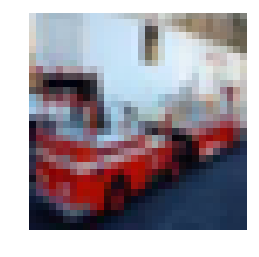

In [10]:
img=pixels_reshaped[5,:,:,:]
#print(img)
plt.imshow(img,cmap='gnuplot2')
plt.axis('off')
plt.show()

In [11]:
# Let's also write two small utilities for drawing samples of images, so we can inspect our results visually.
def draw_img(i):
    im = pixels_reshaped[i,:,:,:]
    #c = y_train[i]
    plt.imshow(im)
    #plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('off')
    plt.show()



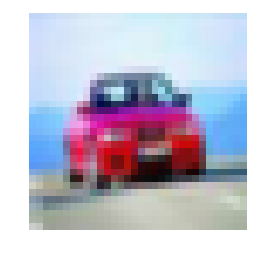

In [12]:
draw_img(3)

In [13]:
def draw_samples_Order(rows, cols):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = pixels_reshaped[i,:,:,:]        
        plt.imshow(im, cmap='gnuplot2')
        plt.title("{}".format(names[labels[i]]), fontsize=12)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.01    #wspace: the amount of width reserved for space between subplots expressed as a fraction of the average axis width
                            , hspace=0.3) #hspace: the amount of height reserved for space between subplots expressed as a fraction of the average axis height

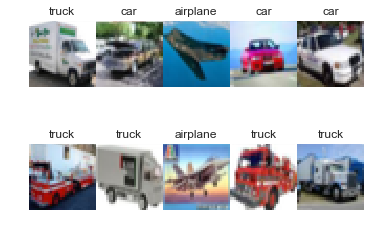

In [14]:
draw_samples_Order(2,5)

In [15]:
def draw_samples_Serie5(pics):       
    plt.subplots_adjust(wspace=0.01, hspace=0.3) 
    plt.title('Scree plot (cumulative sum)')
    
    for i in range(0, 5):
        counter=pics[i]
        #print(counter)
        plt.subplot(2,5, i+1)
        im = pixels_reshaped[counter,:,:,:]        
        plt.imshow(im, cmap='gnuplot2')    
        plt.title("{}".format(names[labels[counter]]), fontsize=12)
        plt.axis('off')        

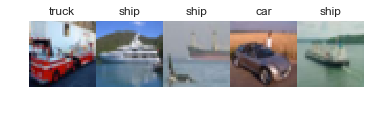

In [16]:
draw_samples_Serie5([5,10,15,25,65])

# Print the class distribution, i.e., the proportion of images in each category

In [17]:
print('Count of images per category: ')
print(labels_df.iloc[:,0].value_counts()) #count the number of rows for each category    
print()
print('Proportion of images in % per category: ')
print(labels_df.iloc[:,0].value_counts()/5000*100)
# Image distribution
#pd.value_counts(labels_df, normalize=True)

Count of images per category: 
3    1250
2    1250
1    1250
0    1250
Name: 0, dtype: int64

Proportion of images in % per category: 
3    25.0
2    25.0
1    25.0
0    25.0
Name: 0, dtype: float64


# What is the accuracy of the "most-frequent" baseline?

In [18]:
# Create X/y arrays
X = overfeat_df
y = labels
#y = labels_df.values
#y=pd.DataFrame(y) #convert to dataframe

print('X:', X.shape) 
print('y:', y.shape) 

X: (5000, 4096)
y: (5000,)


In [19]:
#Split into train & test data
from sklearn.model_selection import train_test_split # Split data
X_tr, X_te, y_tr, y_te = train_test_split(
X, y, test_size=0.2, random_state=0)
print('Train set:', X_tr.shape, y_tr.shape)
print('Test set:', X_te.shape, y_te.shape)

Train set: (4000, 4096) (4000,)
Test set: (1000, 4096) (1000,)


In [20]:
# Compute distribution using Pandas
pd.value_counts(y_tr) / len(y_tr)

1    0.25575
2    0.25075
3    0.24800
0    0.24550
dtype: float64

In [21]:
# Compute distribution using Pandas
pd.value_counts(y_tr, normalize=True)

1    0.25575
2    0.25075
3    0.24800
0    0.24550
dtype: float64

In [22]:
# DummyClassifier to set baselines for classification
from sklearn.dummy import DummyClassifier
# Create the dummy classifier
dummy = DummyClassifier(strategy='most_frequent')
# Fit it
dummy.fit(X_tr, y_tr)
# Compute test accuracy
accuracy = dummy.score(X_te, y_te)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.23


# Plot a few images from the data set, e.g., ten images from each category.

Text(0.5,1,'10 Trucks')

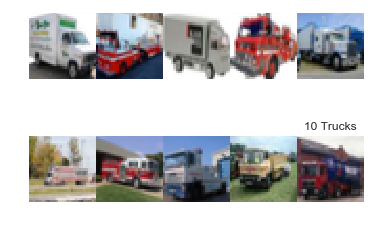

In [23]:
# label 0 = Truck
count_pics = 0
i=0
plt.subplots_adjust(wspace=0.01, hspace=0.3) 

while count_pics < 10:   
    if labels[i]==0:
        plt.subplot(2, 5, count_pics+1)
        im = pixels_reshaped[i,:,:,:]
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        
        count_pics=count_pics+1
    
    i=i+1
    #print(count_pics)
plt.title('10 Trucks')  

Text(0.5,1,'10 Cars')

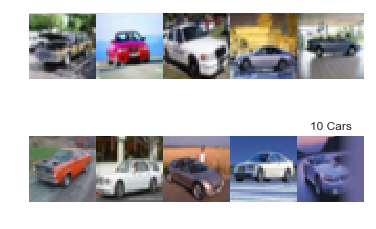

In [24]:
# label 1 = car
count_pics = 0
i=0
plt.subplots_adjust(wspace=0.01, hspace=0.3) 

while count_pics < 10:   
    if labels[i]==1:
        plt.subplot(2, 5, count_pics+1)
        im = pixels_reshaped[i,:,:,:]
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        
        count_pics=count_pics+1
    
    i=i+1    
plt.title('10 Cars') 

Text(0.5,1,'10 Airplanes')

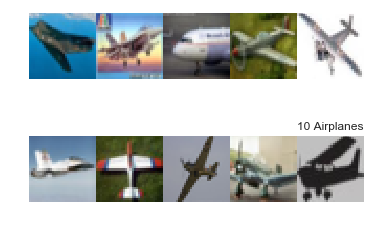

In [25]:
# label 2 = airplane
count_pics = 0
i=0
plt.subplots_adjust(wspace=0.01, hspace=0.3) 

while count_pics < 10:   
    if labels[i]==2:
        plt.subplot(2, 5, count_pics+1)
        im = pixels_reshaped[i,:,:,:]
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        
        count_pics=count_pics+1
    
    i=i+1    
plt.title('10 Airplanes') 

Text(0.5,1,'10 Ships')

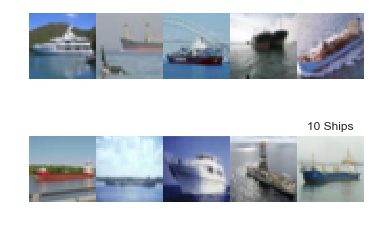

In [26]:
# label 3 = ship
count_pics = 0
i=0
plt.subplots_adjust(wspace=0.01, hspace=0.3) 

while count_pics < 10:   
    if labels[i]==3:
        plt.subplot(2, 5, count_pics+1)
        im = pixels_reshaped[i,:,:,:]
        plt.imshow(im, cmap='gnuplot2')
        plt.axis('off')
        
        count_pics=count_pics+1
    
    i=i+1    
plt.title('10 Ships') 

# Create a scree plot of the OverFeat features

In [27]:
# Create a scree plot of the OverFeat features/overfeat_df
Label_Overfeat_df=pd.concat([labels_df,overfeat_df],axis=1)

#Label_Overfeat_df.rename(columns= {Label_Overfeat_df.iloc[0:0]:'Label'}, inplace=True)
print('Label_Overfeat_df:', Label_Overfeat_df.shape)
print(Label_Overfeat_df.head())

Label_Overfeat_df: (5000, 4097)
   0         0         1         2         3         4         5         6     \
0     0  3.724609 -0.384766  1.587891  0.340088 -0.223022  0.666992 -1.254883   
1     1  3.085938  0.362061  0.362061 -0.590820 -0.196045 -0.209717 -1.400391   
2     2  4.226562  1.132812 -1.130859 -0.345703 -0.852539 -1.305664 -0.786621   
3     1  5.328125  1.015625 -1.489258 -1.112305 -0.164307  1.089844 -3.191406   
4     1  1.552734  0.012062  0.811523  0.767090  0.298340  0.721191 -0.541016   

       7         8       ...         4086      4087      4088      4089  \
0 -0.959473 -0.458252    ...     1.047852 -0.833008  1.199219 -2.082031   
1 -0.801758  0.069763    ...     0.760254 -2.300781  0.070129  0.968750   
2 -1.275391 -3.023438    ...     0.215576  0.838379  0.202881  0.911621   
3  0.200928 -3.447266    ...     0.973145 -3.035156  0.624023 -1.682617   
4 -1.866211 -0.907715    ...     0.615723 -0.403809  1.746094 -1.071289   

       4090      4091      409

In [28]:
#Label_Overfeat_df.iloc[:,0]

In [29]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None) # Unsupervised learning, no y variable

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
# Create X/y arrays
features = overfeat_df
X = features.values
y = labels_df.values

print('X:', X.shape) 
print('y:', y.shape) 

X: (5000, 4096)
y: (5000, 1)


In [31]:
X_2d = pca.transform(X)

# Get the loading vectors
pca.components_

array([[ 0.0003459 , -0.01179106, -0.00572173, ..., -0.01610247,
         0.0011525 , -0.02114426],
       [-0.02531539, -0.01249101, -0.00055079, ...,  0.02104761,
        -0.03141597, -0.01744818]])

In [32]:
# Create DataFrame with variance and principal components
results_df = pd.DataFrame.from_items([
    ('variance', X.var(axis=0)),
    ('1st component', pca.components_[0]),
    ('2nd component', pca.components_[1])
]).set_index(features.columns)

# Sort DataFrame by variance
results_df.sort_values('variance', ascending=False).head()

C:\Users\x\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """


,variance,1st component,2nd component
1218,1.995888,-0.043986,-0.000786
1595,1.876362,-0.016354,0.051390
1063,1.875791,-0.025852,0.047467
1125,1.784245,-0.007467,-0.062998
1155,1.735491,-0.019993,0.053500


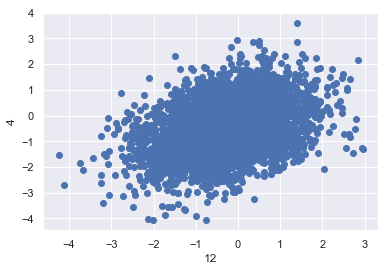

In [33]:
# Plot 2 variables
plt.scatter(
    X[:, 12], 
    X[:, 4] 
)
plt.xlabel('12')
plt.ylabel('4')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
scaler = StandardScaler()

# Rescale data
X_rescaled = scaler.fit_transform(X)

# Create PCA transformer
pca2 = PCA(n_components=2)

# Apply PCA to rescaled data
X_2d_rescaled = pca2.fit_transform(X_rescaled)

# Create DataFrame with variance and principal components
results_df2 = pd.DataFrame.from_items([
    ('variance', X_rescaled.var(axis=0)),
    ('1st component', pca2.components_[0]),
    ('2nd component', pca2.components_[1])
]).set_index(features.columns)

# Sort DataFrame by the coefficients of the 1st loading vector
results_df2.sort_values('1st component', ascending=False).head()

C:\Users\x\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,variance,1st component,2nd component
3927,0.999998,0.014855,-0.015512
424,1.000000,0.013569,-0.003652
3025,0.999999,0.012214,-0.010646
3539,1.000002,0.010719,-0.012408
696,1.000002,0.009919,-0.030259


In [35]:
# Get explained variance
pca2.explained_variance_ratio_

array([0.16084108, 0.07457723], dtype=float32)

In [36]:
# Create PCA transformer
pca3 = PCA(n_components=None)

# Apply PCA to rescaled data
pca3.fit(X_rescaled)

# Proportion of variance explained
pve = pca3.explained_variance_ratio_
pve

array([1.6084088e-01, 7.4577376e-02, 4.4979695e-02, ..., 5.7888346e-13,
       5.7509883e-13, 5.5645907e-13], dtype=float32)

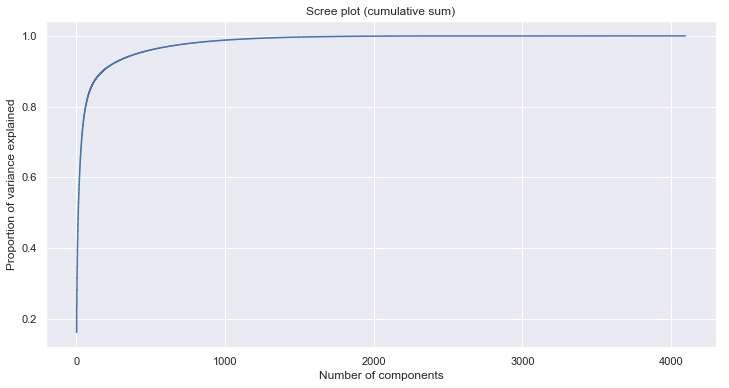

In [37]:
# Create Scree plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.figure( figsize=(12, 6))
# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum, # Cumulative sum
    label='cumulative'
)

# Add labels
plt.title('Scree plot (cumulative sum)')
plt.xlabel('Number of components')
plt.ylabel('Proportion of variance explained')
plt.show()

# What is the cumulated proportion of variance explained (PVE) in the first two components?

In [38]:
pve

array([1.6084088e-01, 7.4577376e-02, 4.4979695e-02, ..., 5.7888346e-13,
       5.7509883e-13, 5.5645907e-13], dtype=float32)

In [39]:
pve_df=pd.DataFrame(pve) #convert to dataframe
print(pve_df.head())
print(pve_df.describe())

          0
0  0.160841
1  0.074577
2  0.044980
3  0.035157
4  0.030732
                  0
count  4.096000e+03
mean   2.441407e-04
std    3.179929e-03
min    5.564591e-13
25%    2.933952e-11
50%    2.161358e-06
75%    2.726973e-05
max    1.608409e-01


In [40]:
pve_cumsum2 = pve[0]+pve[1]
print('cumulated proportion of variance explained (PVE) in the first two components = ',pve_cumsum2)

cumulated proportion of variance explained (PVE) in the first two components =  0.23541826


# How many components should we keep to retain 80%, 90%, 95% and 99% of the variance explained?

In [56]:
#80% of the variance explained
sum_pve = 0
i=0
while sum_pve < 0.8:
    sum_pve=sum_pve+pve[i]
    #print('component:',i,'Sum-PVE=',sum_pve)
    i=i+1
print('80%: ',i,'Components','for Sum-PVE=',sum_pve)

#90% of the variance explained
sum_pve = 0
i=0
while sum_pve < 0.9:
    sum_pve=sum_pve+pve[i]
    #print('component:',i,'Sum-PVE=',sum_pve)
    i=i+1
print('90%: ',i,'Components','for Sum-PVE=',sum_pve)

#95% of the variance explained
sum_pve = 0
i=0
while sum_pve < 0.95:
    sum_pve=sum_pve+pve[i]
    #print('component:',i,'Sum-PVE=',sum_pve)
    i=i+1
print('95%: ',i,'Components','for Sum-PVE=',sum_pve)

#99% of the variance explained
sum_pve = 0
i=0
while sum_pve < 0.99:
    sum_pve=sum_pve+pve[i]
    #print('component:',i,'Sum-PVE=',sum_pve)
    i=i+1
print('99%: ',i,'Components','for Sum-PVE=',sum_pve)
    

80%:  62 Components for Sum-PVE= 0.8009388693608344
90%:  176 Components for Sum-PVE= 0.9001692523306701
95%:  408 Components for Sum-PVE= 0.9500094570539659
99%:  1072 Components for Sum-PVE= 0.9900194831789122


# Create a 2d plot of the OverFeat features

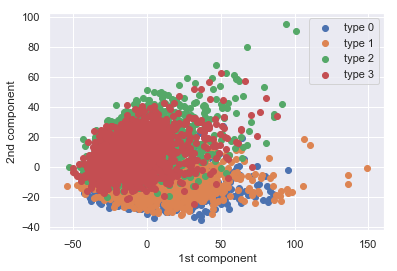

In [42]:
# 2d plot of the OverFeat features of 5000 values
for kind in [0, 1, 2, 3]:
    # Category samples of this type
    idx = (y[:,0] == kind)

    # Plot their components
    plt.scatter(
        X_2d[idx, 0], X_2d[idx, 1],
        label='type {}'.format(kind)
    )
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [43]:
#Split data into subset of 500
X_sub1, X_sub2, y_sub1,y_sub3 = train_test_split(
X, y, test_size=500, random_state=0)
print('Train set:', X_sub1.shape, y_sub1.shape)
print('Sub set:', X_sub2.shape, y_sub3.shape)
X_2d_sub = pca.transform(X_sub2)

Train set: (4500, 4096) (4500, 1)
Sub set: (500, 4096) (500, 1)


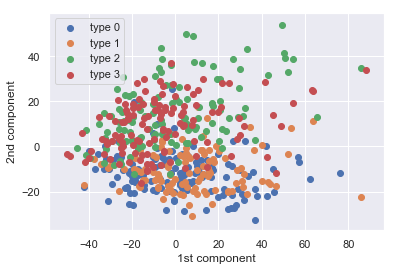

In [44]:
# 2d plot of the OverFeat features of 500 values
for kind in [0, 1, 2, 3]:
    # Category samples of this type
    idx = (y_sub3[:,0] == kind)

    # Plot their components
    plt.scatter(
        X_2d_sub[idx, 0], X_2d_sub[idx, 1],
        label='type {}'.format(kind)
    )
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

In [45]:
# 408 Components cover >95%
#Split data into subset of 408
X_sub1, X_sub2, y_sub1,y_sub3 = train_test_split(
X, y, test_size=408, random_state=0)
print('Train set:', X_sub1.shape, y_sub1.shape)
print('Sub set:', X_sub2.shape, y_sub3.shape)
X_2d_sub = pca.transform(X_sub2)

Train set: (4592, 4096) (4592, 1)
Sub set: (408, 4096) (408, 1)


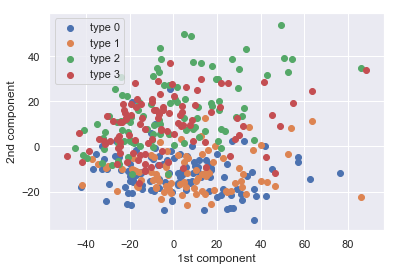

In [46]:
# 2d plot of the OverFeat features of 408 values
for kind in [0, 1, 2, 3]:
    # Category samples of this type
    idx = (y_sub3[:,0] == kind)

    # Plot their components
    plt.scatter(
        X_2d_sub[idx, 0], X_2d_sub[idx, 1],
        label='type {}'.format(kind)
    )
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

-> Observation: highly scattered, type 0 & 1 on the bottom/type 2&3 on top

# Create a 2d plot using the matrix of image pixels

In [47]:
# Create X/y arrays
features = pixels_df
X = pixels_df.values
y = labels_df.values

print('X:', X.shape) 
print('y:', y.shape) 

X: (5000, 3072)
y: (5000, 1)


In [48]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca = PCA(n_components=2)

# Apply PCA
pca.fit(X, y=None) # Unsupervised learning, no y variable

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X_2d = pca.transform(X)

# Get the loading vectors
pca.components_

array([[-0.02527102, -0.02621967, -0.02742579, ..., -0.01720944,
        -0.01817761, -0.0189964 ],
       [-0.02214319, -0.020578  , -0.01912234, ...,  0.01848377,
         0.02006754,  0.02288046]], dtype=float32)

In [50]:
# Create DataFrame with variance and principal components
results_df = pd.DataFrame.from_items([
    ('variance', X.var(axis=0)),
    ('1st component', pca.components_[0]),
    ('2nd component', pca.components_[1])
]).set_index(features.columns)

# Sort DataFrame by variance
results_df.sort_values('variance', ascending=False)

C:\Users\x\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """


,variance,1st component,2nd component
194,0.086147,-0.028505,-0.019094
482,0.085943,-0.029158,-0.016515
386,0.085908,-0.029026,-0.017875
290,0.085900,-0.028857,-0.018550
98,0.085715,-0.028021,-0.019389
578,0.085582,-0.029201,-0.014587
2,0.085265,-0.027426,-0.019122
674,0.085261,-0.029194,-0.012685
191,0.084502,-0.027700,-0.018394
101,0.084434,-0.027665,-0.019867


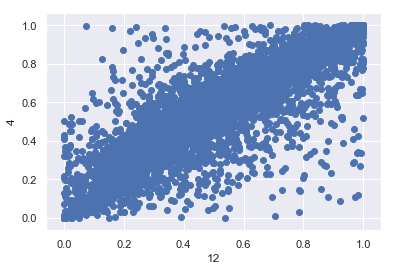

In [51]:
# Plot 2 variables
plt.scatter(
    X[:, 12], 
    X[:, 4] 
)
plt.xlabel('12')
plt.ylabel('4')
plt.show()

In [52]:
#Split data into subset of 500
X_sub1, X_sub2, y_sub1,y_sub3 = train_test_split(
X, y, test_size=500, random_state=0)
print('Train set:', X_sub1.shape, y_sub1.shape)
print('Sub set:', X_sub2.shape, y_sub3.shape)
X_2d_sub = pca.transform(X_sub2)

Train set: (4500, 3072) (4500, 1)
Sub set: (500, 3072) (500, 1)


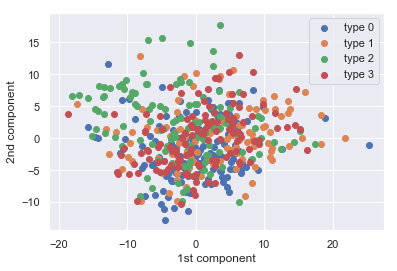

In [53]:
# 2d plot of the pixels features of 500 values
for kind in [0, 1, 2, 3]:
    # Category samples of this type
    idx = (y_sub3[:,0] == kind)

    # Plot their components
    plt.scatter(
        X_2d_sub[idx, 0], X_2d_sub[idx, 1],
        label='type {}'.format(kind)
    )
# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

-> Observation: highly scattered, no correlation visible